<a href="https://colab.research.google.com/github/ChrisStavropoulos/AI-in-Cybersecurity/blob/main/cyberthreathunting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-2-f17c6fed6969>:35: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  count_classes = pd.value_counts(data['Class'], sort = True)


Ακρίβεια (Accuracy): 0.9996
Ακρίβεια (Precision): 0.9811
Ανάκληση (Recall): 0.6933
F1 Score: 0.8125

Classification Report:
              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00     56887
       Fraud       0.98      0.69      0.81        75

    accuracy                           1.00     56962
   macro avg       0.99      0.85      0.91     56962
weighted avg       1.00      1.00      1.00     56962



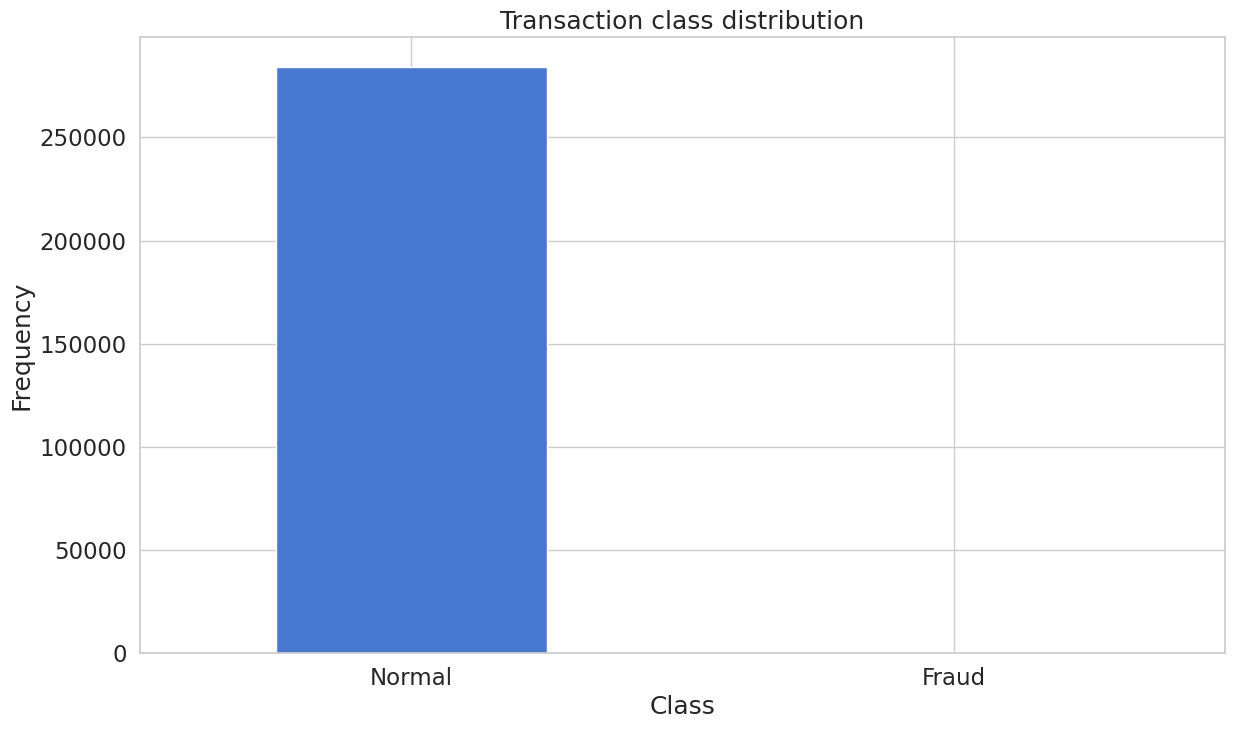

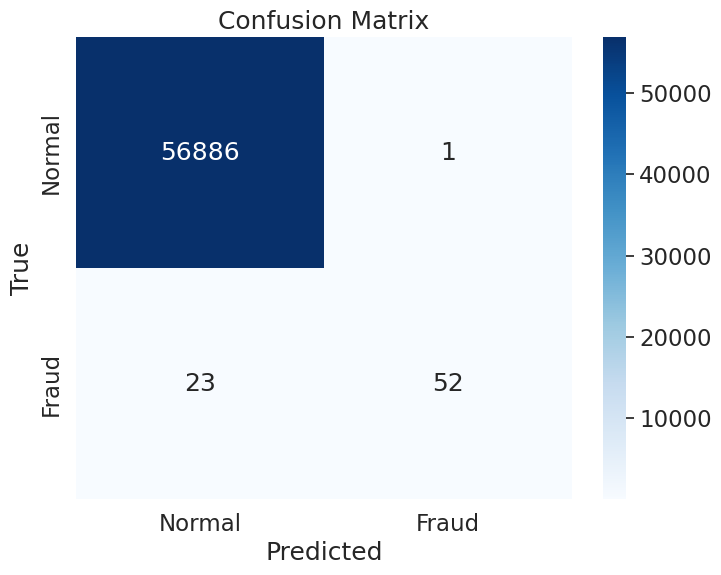

In [ ]:

# φόρτωση βιβλιοθηκών
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
%matplotlib inline

# έλεγχος κατανομής κλάσεων
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42
LABELS = ["Normal", "Fraud"]

# φόρτωση συνόλου δεδομένων
url = "https://raw.githubusercontent.com/nsethi31/Kaggle-Data-Credit-Card-Fraud-Detection/master/creditcard.csv"
data = pd.read_csv(url)

# διαγραφή κενών ή μη αριθμητικών τιμών
data = data.select_dtypes(include=['float64', 'int64']).dropna()

# διαχωρισμός ανεξάρτητων και εξαρτημένων μεταβλητών
X = data.drop('Class', axis=1)
y = data['Class']

# διαχωρισμός συνόλου δεδομένων σε σύνολο εκπαίδευσης και δοκιμών
train_size = int(0.8 * len(data))
train_data = data[:train_size]
test_data = data[train_size:]

# κατανομή της εξαρτημένης μεταβλητής (class)
count_classes = pd.value_counts(data['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction class distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency");

# δημιουργία Random Forest αλγορίθμου
X_train = train_data.drop('Class', axis=1)
y_train = train_data['Class']
X_test = test_data.drop('Class', axis=1)
y_test = test_data['Class']
rf = RandomForestClassifier(n_estimators=100, random_state=RANDOM_SEED)

# εκπαίδευση αλγόριθμου
rf.fit(X_train, y_train)

# πρόβλεψη συνόλου δοκιμής
y_pred = rf.predict(X_test)

# υπολογισμός μετρικών αξιολόγησης (accuracy, precision, recall, f-score, confusion matrix)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Εκτύπωση μετρικών
print(f"Ακρίβεια (Accuracy): {accuracy:.4f}")
print(f"Ακρίβεια (Precision): {precision:.4f}")
print(f"Ανάκληση (Recall): {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Εκτύπωση του classification report (περιλαμβάνει precision, recall, f1-score για κάθε κατηγορία)
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=LABELS))

# Δημιουργία confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Οπτικοποίηση confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=LABELS, yticklabels=LABELS)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()